# Introduction to Data Engineering

Firat YASAR

Data & Cloud Engineer @ SFEIR

# 1. Data Engineering

What is Data Engineering?


What is ETL?

- Extract
- Transform
- Load

There are lots of platforms, softwares, tools used in Data Engineering.

- Data Warehouse
- Data Lakehouse

API (application programming interface)

In [28]:
import matplotlib.pyplot as plt
import numpy as np

## 1.1 Extract

1.1 Get the textual data

Note that we use ``requests`` library to extract data from a website (from wikipedia).

We define a function ``wikipedia_page`` which returns the page of a title.

In [29]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page 
    given a wikipedia page title
    '''
    params = { 
        'action': 'query', 
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts', 
        'explaintext': True
    }
    # send a request to the wikipedia api 
    response = requests.get(
         'https://en.wikipedia.org/w/api.php',
         params= params
     ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))
    # return the page content 
    if 'extract' in page.keys():
        return page['extract'].lower()
    else:
        return "Page not found"

In [30]:
# We lowercase the text to avoid having to deal with uppercase and capitalized words
earth = wikipedia_page('Earth')
print ("Here is the beginning of the text (limited to 250 caracters):\n")
print(earth[:250]) 

Here is the beginning of the text (limited to 250 caracters):

earth is the third planet from the sun and the only place known in the universe where life has originated and found habitability. earth is the only planet known to sustain liquid surface water, with ocean water extending over 70.8% of the planet, mak


## 1.2 Transform

In this section, we will transform the text and extract the 20 most common words in it. Let us first see how it will look like using a wordcloud:

In [31]:
# import the wordcloud library

from wordcloud import WordCloud, STOPWORDS

# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state=8,
                      normalize_plurals=False,
                      width=600,
                      height=300,
                      max_words=300,
                      stopwords=STOPWORDS).generate(earth)

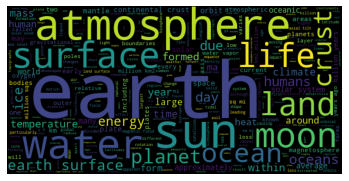

In [32]:
# Display the generated Word Cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Now we will compute the frequency of each word and get the most common 20 words in the text:

In [33]:
from collections import Counter

# we transform the text into a list of words
# by splitting over the space character ' '
earth_word_list = earth.split(' ')

# and count the words
earth_word_counts = Counter(earth_word_list)

In [34]:
# transform the text into a list of words
earth_words_list = earth.split(' ')

# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']

# use a python list comprehension to remove the stopwords from words_list
earth_without_stopwords = [word for word in earth_words_list if word not in stopwords]

In [35]:
Counter(earth_without_stopwords).most_common(20)

[("earth's", 109),
 ('earth', 70),
 ('surface', 48),
 ('it', 43),
 ('about', 43),
 ('on', 40),
 ('solar', 39),
 ('has', 37),
 ('million', 36),
 ('which', 35),
 ('have', 35),
 ('water', 34),
 ('into', 32),
 ('or', 30),
 ('life', 28),
 ('other', 28),
 ('most', 26),
 ('sun', 25),
 ('crust', 25),
 ('been', 25)]

In [36]:
common_earth = Counter(earth_without_stopwords).most_common(20)

In [37]:
common_earth

[("earth's", 109),
 ('earth', 70),
 ('surface', 48),
 ('it', 43),
 ('about', 43),
 ('on', 40),
 ('solar', 39),
 ('has', 37),
 ('million', 36),
 ('which', 35),
 ('have', 35),
 ('water', 34),
 ('into', 32),
 ('or', 30),
 ('life', 28),
 ('other', 28),
 ('most', 26),
 ('sun', 25),
 ('crust', 25),
 ('been', 25)]

## 1.3 Load

Let us create an empty dataframe.

It will have two columns:
- title = the title of the article
- common_words = most common words in the article

In [38]:
import pandas as pd

# initialize list of lists
data = []

# Create the pandas DataFrame
df = pd.DataFrame(
    data, columns=['title', 'common_words'])

# print dataframe.
df

,title,common_words


As seen here, we now have an empty dataframe. Let us add rows to it:

In [39]:
def add_new (title, common):
    df.loc[df.shape[0]] = [title, common]
    df.drop_duplicates(subset=['title'],inplace=True) # remove duplicate rows
    df.reset_index(drop=True, inplace=True)
    return df

Add the wikipedia article "earth"

In [40]:
add_new("earth", common_earth)

,title,common_words
0,earth,"[(earth's, 109), (earth, 70), (surface, 48), (..."


Save as a csv file:

In [41]:
df.to_csv('result.csv')

Let us add a new row. This time we add "moon" wiki article:

In [42]:
moon = wikipedia_page('Moon').lower()

# by splitting over the space character ' '
moon_words_list = moon.split(' ')

# and count the words
moon_word_counts = Counter(moon_words_list)

# use a python list comprehension to remove the stopwords from words_list
moon_without_stopwords = [word for word in moon_words_list if word not in stopwords]

common_moon = Counter(moon_without_stopwords).most_common(20)

As you see, we followed the same procedure for "moon" as we did it for "earth"

In [43]:
add_new("moon", common_moon)

,title,common_words
0,earth,"[(earth's, 109), (earth, 70), (surface, 48), (..."
1,moon,"[(, 477), (moon, 210), (lunar, 144), (on, 112)..."


In [44]:
df.to_csv('result.csv')

# 2. Data Engineering tools

Programming Languages
- Python
- C++
- C#

- SQL

- Bash, Linux commands
- and more...

Platforms
- Databricks
- GCP Dataflow

there are lots of them.

# 3. Cloud

**Cloud computing**
	- on demand, self-service
	- on internet
	- no worries for physical location
	- elastic
	- pay only what you use

**3 waves on the history of cloud computing**
	- colocation
	- virtualisation
	- container-based architecture

**IaaS (Infrastructure as a Service) & PaaS (Platform as a Service)**

In the IaaS model, customers pay for the resources they allocate ahead of time; 
In the PaaS model, customers pay for the resources they actually use.

```ad-warning
IaaS provides raw compute, storage, and network resources that are organised similarly to physical data centers

PaaS binds application code to libraries that give access to the infrastructure an application needs
```


IBM
GOOGLE CLOUD
AZURE
AMAZON WEB SERVICE

Docker ve Kubernetes

## Homework

Write a python application that takes one positional argument ``article``. 
The script must 
- extract the text file from the wikipedia
- transform the text as we did above
- load the article using add_new function above

When you run the script, it must load the new article to the file results.csv

### Step 1.

Complete the following

```python
import sys

def wiki_function (article):
    # write your code here 


if __name__ == "__main__":
    article = str(sys.argv[1])
    wiki_function(article)
```

### Step 2. 

Create a file ``app.py`` and put the code in the previous cell into this file.

### Step 3. How to use the script ?

open terminal
and put 

```shell
python app.py <"the_title">
```

For instance, if you put 

```shell
python app.py "sun"
```

it will load the data into result.csv